# Marija Jovanović 261/M18

# Agriculture Data Analysis

Data originate from Syngenta Crop Challenge that aimed to explore how analytics could help farmers make better decisions in selecting corn seed varieties that reliably reduced risk and increased yields given information about the soil and climate.

In [142]:
import os
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import operator

In [143]:
os.chdir('C:\\Users\\Korisnik\\Desktop\\Projekat4')

In [144]:
weather = pd.read_csv('weather_data.csv')
performance = pd.read_csv('performance_data.csv')

In [145]:
weather.head()

,ENV_ID,DAY_NUM,DAYL,PREC,SRAD,SWE,TMAX,TMIN,VP
0,Env_1,1,29030.40039,0,92.800003,24,-14.5,-21.0,120
1,Env_1,2,29030.40039,0,166.399994,24,-7.0,-26.0,80
2,Env_1,3,29030.40039,0,144.000000,24,0.0,-12.5,240
3,Env_1,4,29030.40039,0,112.000000,24,-3.5,-11.5,240
4,Env_1,5,29030.40039,1,153.600006,24,2.5,-11.5,240


In [146]:
performance.head()

,HYBRID_ID,ENV_ID,HYBRID_MG,ENV_MG,YIELD,YEAR,LAT,LONG,PLANT_DATE,HARVEST_DATE,...,ENV_YIELD_STD,ELEVATION,CLAY,SILT,SAND,AWC,PH,OM,CEC,KSAT
0,H2782,Env_1,0,0,107.9577,2008,49.5,-98.0,2008-05-06,2008-11-03,...,7.591866,870.65,22.7,23.0,54.5,18.65,7.2,6.1,24.2,9.4
1,H2782,Env_2,0,0,85.7498,2008,49.3,-98.1,2008-05-14,2008-10-22,...,7.184953,942.41,22.7,22.0,55.8,18.75,7.3,6.9,25.2,10.2
2,H2240,Env_3,0,0,74.6116,2011,49.3,-98.0,2011-05-17,2011-10-17,...,4.583234,903.46,22.8,21.5,55.8,18.95,7.4,6.7,25.5,9.9
3,H1527,Env_3,0,0,83.8191,2011,49.3,-98.0,2011-05-17,2011-10-17,...,4.583234,903.46,22.8,21.5,55.8,18.95,7.4,6.7,25.5,9.9
4,H1369,Env_3,0,0,81.7917,2011,49.3,-98.0,2011-05-17,2011-10-17,...,4.583234,903.46,22.8,21.5,55.8,18.95,7.4,6.7,25.5,9.9


# 1. Data preprocessing: Deal with missing values if there are any. Aggregate samples with same Environment and Hybrid

In [147]:
w = weather.isnull() #checking if there are missing values, there aren't any
w.any()

ENV_ID     False
DAY_NUM    False
DAYL       False
PREC       False
SRAD       False
SWE        False
TMAX       False
TMIN       False
VP         False
dtype: bool

In [148]:
p = performance.isnull() #checking if there are missing values, there are, in IRRIGATION column 
p.any()


HYBRID_ID         False
ENV_ID            False
HYBRID_MG         False
ENV_MG            False
YIELD             False
YEAR              False
LAT               False
LONG              False
PLANT_DATE        False
HARVEST_DATE      False
IRRIGATION         True
ENV_YIELD_MEAN    False
ENV_YIELD_STD     False
ELEVATION         False
CLAY              False
SILT              False
SAND              False
AWC               False
PH                False
OM                False
CEC               False
KSAT              False
dtype: bool

In [149]:
performance.shape[0]

387427

In [150]:
p_null = performance[performance['IRRIGATION'].isnull()] 
p_null.shape[0]
#less than 2.7% of data are missing values for irrigation, so we will drop them

8284

In [151]:
performance = performance.dropna() 
performance.isnull().any()  #now there are no missing values in out dataset

HYBRID_ID         False
ENV_ID            False
HYBRID_MG         False
ENV_MG            False
YIELD             False
YEAR              False
LAT               False
LONG              False
PLANT_DATE        False
HARVEST_DATE      False
IRRIGATION        False
ENV_YIELD_MEAN    False
ENV_YIELD_STD     False
ELEVATION         False
CLAY              False
SILT              False
SAND              False
AWC               False
PH                False
OM                False
CEC               False
KSAT              False
dtype: bool

In [152]:
grouped = performance.groupby([performance['HYBRID_ID'], performance['ENV_ID']])
g_mean = grouped.mean()
g_mean.reset_index()
#aggregation of samples with same hybrid and environment 

,HYBRID_ID,ENV_ID,HYBRID_MG,ENV_MG,YIELD,YEAR,LAT,LONG,ENV_YIELD_MEAN,ENV_YIELD_STD,ELEVATION,CLAY,SILT,SAND,AWC,PH,OM,CEC,KSAT
0,H1000,Env_1018,4,7,74.032800,2016,39.4,-100.6,74.163568,9.439124,2937.36,24.00,47.30,28.700000,22.600000,7.10,2.300000,19.700000,3.800000
1,H1000,Env_1034,4,7,129.707200,2016,40.9,-97.2,128.036227,15.676446,1547.69,28.20,61.50,10.200000,26.050000,6.10,3.600000,27.800000,1.000000
2,H1000,Env_1042,4,7,109.490200,2016,41.0,-97.1,125.628527,10.113445,1568.11,30.50,53.30,16.300000,25.650000,6.20,3.300000,28.000000,1.200000
3,H1000,Env_106,4,2,112.395400,2016,45.0,-92.3,104.492388,14.656057,1266.89,18.70,48.00,33.700000,22.050000,5.80,6.000000,22.300000,2.100000
4,H1000,Env_1066,4,7,119.805200,2016,41.4,-95.0,147.266531,14.424536,1168.68,29.50,59.30,11.000000,26.050000,6.20,3.700000,27.500000,0.900000
5,H1000,Env_1071,4,7,105.753000,2016,41.5,-94.1,121.410719,15.522331,1123.05,29.70,58.30,11.700000,26.050000,6.20,3.900000,28.800000,0.800000
6,H1000,Env_109,4,2,129.747800,2013,44.6,-88.2,114.230935,11.110132,801.68,19.00,43.30,37.700000,21.050000,6.50,6.900000,20.800000,3.800000
7,H1000,Env_112,4,2,127.467315,2016,44.6,-88.2,126.252099,12.572319,800.05,19.50,41.30,39.800000,20.250000,6.50,6.900000,20.300000,4.100000
8,H1000,Env_1230,4,7,110.433300,2012,40.2,-82.7,114.644471,12.416791,1125.39,25.50,49.30,26.200000,22.800000,6.10,5.900000,20.800000,1.600000
9,H1000,Env_132,4,2,111.968900,2013,43.3,-80.6,101.754376,12.695773,1101.00,20.20,44.50,35.000000,23.350000,6.80,8.700000,28.300000,3.600000


# 2. Calculate average values for all attributes present in weather dataset for all Environments. Visualize distributions of attributes through boxplot graphs.

In [153]:
weather1 = weather.groupby(weather['ENV_ID'])
w_mean = weather1.mean() 
w_mean
#average values for all atributes in dataset weather for every environment

,DAY_NUM,DAYL,PREC,SRAD,SWE,TMAX,TMIN,VP
ENV_ID,,,,,,,,
Env_1,183.0,43200.000043,1.684932,276.111781,11.167123,8.093151,-3.256164,630.356164
Env_10,183.0,43200.946768,3.079452,294.978630,19.868493,12.095890,2.241096,874.191781
Env_100,183.0,43200.000069,2.901370,296.714521,20.679452,12.616438,0.632877,820.054795
Env_1000,183.0,43200.946854,2.000000,352.368219,0.997260,18.323288,2.883562,824.876712
Env_1001,183.0,43200.946854,2.561644,341.681097,2.443836,17.701370,2.924658,862.246575
Env_1002,183.0,43200.946854,2.876712,348.729863,0.460274,19.241096,3.761644,914.739726
Env_1003,183.0,43200.946854,1.843836,359.390685,6.816438,18.979452,2.680822,841.315068
Env_1004,183.0,43200.946854,0.810959,373.742466,4.219178,21.521918,3.890411,644.602740
Env_1005,183.0,43200.946854,1.386301,359.101370,0.613699,18.705479,2.741096,750.575342


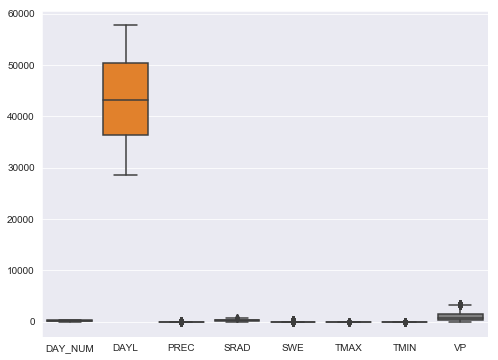

<Figure size 432x288 with 0 Axes>

In [154]:
plt.figure(figsize=(8,6))
sns.boxplot(data=weather[['DAY_NUM', 'DAYL','PREC', 'SRAD','SWE','TMAX','TMIN','VP' ]])
sns.set_style("darkgrid")
plt.savefig("boxplot1.png", dpi=100)
plt.show()
plt.clf()

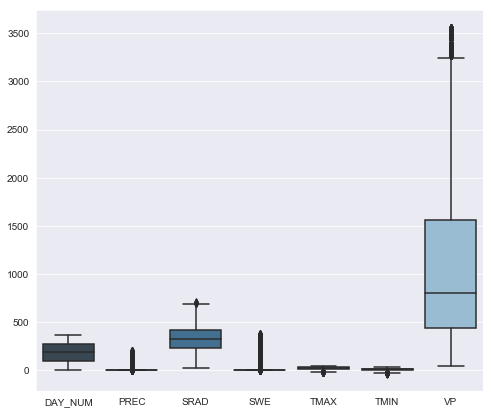

<Figure size 432x288 with 0 Axes>

In [155]:
plt.figure(figsize=(8,7)) #boxplot without DAYL attribute, so we can better see boxes for other attributes
sns.boxplot(data=weather[['DAY_NUM', 'PREC', 'SRAD','SWE','TMAX','TMIN','VP']],palette = "Blues_d")
# ymax = max(weather[['DAY_NUM', 'PREC', 'SRAD','SWE','TMAX','TMIN','VP']])
# ymin = min(weather[['DAY_NUM', 'PREC', 'SRAD','SWE','TMAX','TMIN','VP']])
# ax.set_ylim([ymax,ymin])
plt.savefig("boxplot2.png", dpi=100)
plt.show()
plt.clf()

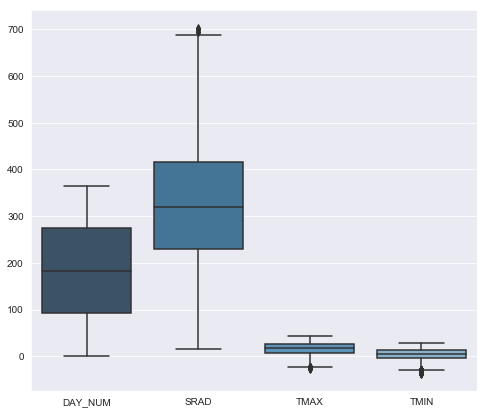

<Figure size 432x288 with 0 Axes>

In [156]:
plt.figure(figsize=(8,7))
sns.boxplot(data=weather[[ 'DAY_NUM','SRAD','TMAX','TMIN']],palette = "Blues_d")
plt.savefig("boxplot3.png", dpi=100)
plt.show()
plt.clf()

# 3. Calculate mean yield trend over years (for each year measure mean yield and standard deviation). Plot mean trend along with standard deviation values.


In [157]:
p = performance['YIELD'].groupby(performance['YEAR'])

In [158]:
p.mean() 

YEAR
2008    118.312915
2009    121.618531
2010    112.274291
2011    113.389259
2012    107.409464
2013    122.435656
2014    123.106929
2015    125.000903
2016    129.131640
2017    135.098036
Name: YIELD, dtype: float64

In [159]:
p.std()

YEAR
2008    21.249555
2009    19.208919
2010    21.434224
2011    18.708530
2012    26.011529
2013    20.996685
2014    21.381993
2015    19.491869
2016    18.632030
2017    20.548562
Name: YIELD, dtype: float64

In [160]:
p_mean = p.mean() 
p_std = p.std()
p_mean_plus = p_mean + p_std
p_mean_minus = p_mean - p_std
print('Lower bound for mean yield trend:')
print(p_mean_minus)
print('\nUpper bound for mean yield trend:')
print(p_mean_plus)
#calculating mean yield trend

Lower bound for mean yield trend:
YEAR
2008     97.063360
2009    102.409612
2010     90.840068
2011     94.680728
2012     81.397935
2013    101.438972
2014    101.724935
2015    105.509034
2016    110.499610
2017    114.549474
Name: YIELD, dtype: float64

Upper bound for mean yield trend:
YEAR
2008    139.562470
2009    140.827450
2010    133.708515
2011    132.097789
2012    133.420993
2013    143.432341
2014    144.488922
2015    144.492772
2016    147.763670
2017    155.646598
Name: YIELD, dtype: float64


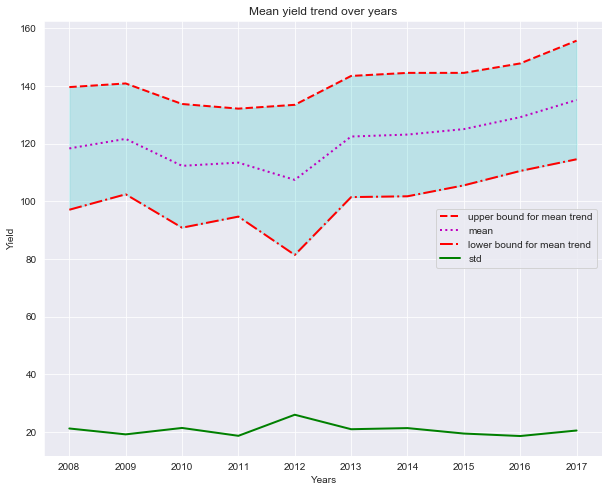

<Figure size 432x288 with 0 Axes>

In [161]:
M, S = p.mean(), p.std() #plotting mean yield trend, mean and standard deviation over years
X = list(range(2008,2018))

plt.figure(figsize=(10,8))
plt.plot(M+S,color="r", linewidth=2.0, linestyle="--",label="upper bound for mean trend")
plt.plot(M,color="m", linewidth=2.0, linestyle=":",label="mean")
plt.plot(M-S,color="r", linewidth=2.0, linestyle="-.",label="lower bound for mean trend")
plt.plot(S,color="g", linewidth=2.0, linestyle="-",label="std")
plt.fill_between(X, M+S, M-S, color='c', alpha=0.2)
plt.xticks(np.arange(2008, 2018, step=1))
plt.xlabel('Years')
plt.ylabel('Yield')
plt.title('Mean yield trend over years')
plt.legend(loc='best')
plt.savefig("meantrend1.png", dpi=100)
plt.show()
plt.clf()

# 4. Discover top 3 hybrids based on mean yield. Plot histogram of yield for top hybrids.

In [162]:
yield_and_hybrid = performance.pivot_table(values='YIELD', index='HYBRID_ID', aggfunc=np.mean)
yield_and_hybrid = yield_and_hybrid.reset_index()
top3 = sorted(list(yield_and_hybrid['YIELD']))[-3:]
hibrid_top3 = yield_and_hybrid[yield_and_hybrid['YIELD'].isin(top3)]
hibrid_top3 
#top 3 hybrids based on mean yield

,HYBRID_ID,YIELD
1630,H2870,149.348408
2319,H3794,149.466700
2404,H3931,150.016557


In [163]:
lista_top3 = list(hibrid_top3['HYBRID_ID']) 
print('Top 3 hybrids based on mean yield are: ' +lista_top3[0]+', '+lista_top3[1]+', '+lista_top3[2])
#list of those top 3 hybrids

Top 3 hybrids based on mean yield are: H2870, H3794, H3931


In [164]:
def f_hist_yield(i):
    hibrid1 = performance[performance['HYBRID_ID'] == i]
    plt.figure(figsize=(10,5))
    plt.xlabel('Yield')
    plt.ylabel('Absolute frequency')
    plt.title('Histogram of Yield for '+i)
    plt.hist(hibrid1['YIELD'], 24,facecolor='c', alpha=0.75) 
    plt.grid(True)
    plt.savefig('hist'+ i +'.png', dpi=100)
    return plt.show()
    plt.clf()

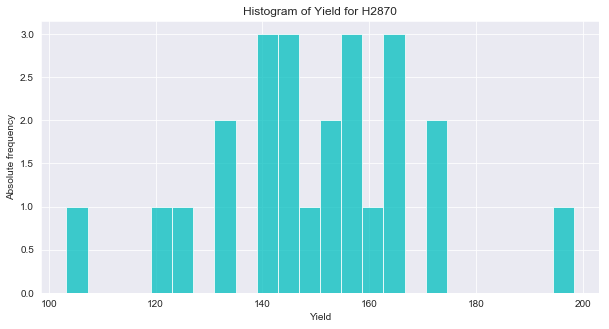

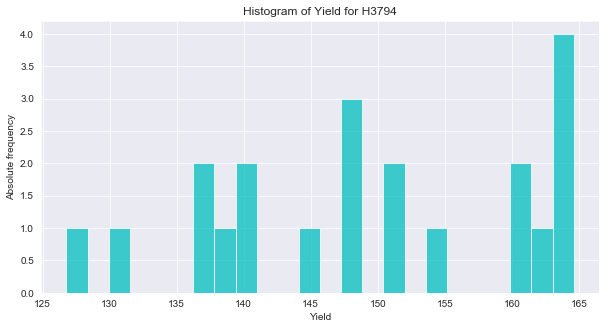

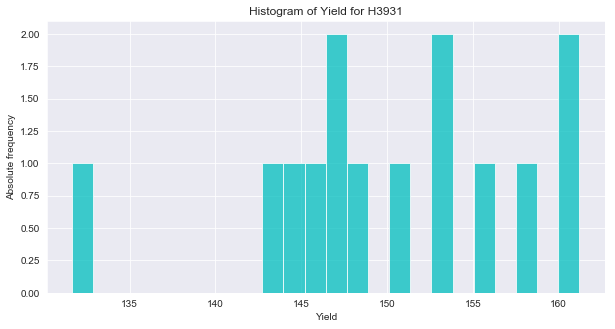

In [165]:
for i in range(len(lista_top3)):
    f_hist_yield(lista_top3[i])

In [166]:
def f_hist_yield_all(lista):

        hibrid1 = performance[performance['HYBRID_ID'] == lista[0] ]
        hibrid2 = performance[performance['HYBRID_ID'] == lista[1] ]
        hibrid3 = performance[performance['HYBRID_ID'] == lista[2] ]
        legend = [lista[0],lista[1], lista[2]]
        plt.figure(figsize=(10,5))
        plt.xlabel('Yield')
        plt.ylabel('Relative frequency')
        plt.title('Histogram of Yield for '+lista[0]+', '+lista[1]+', '+lista[2])
      
        plt.hist([hibrid1['YIELD'],hibrid2['YIELD'],hibrid3['YIELD']], 24, density=1, color=['orange', 'green','red'], alpha=0.75) 
        plt.legend(legend)
        plt.grid(True)
        plt.savefig("histall.png", dpi=100)
        return plt.show()
        plt.clf()

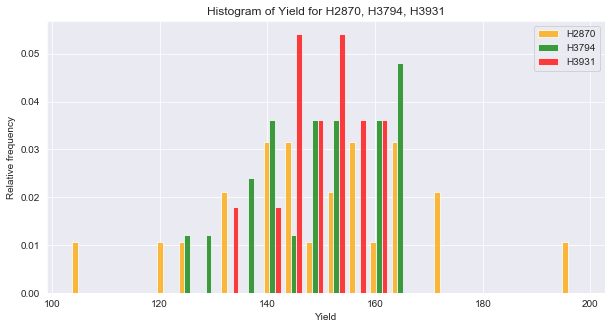

In [167]:
f_hist_yield_all(lista_top3)

# 5. For each of top hybrids calculate correlation between each continuous attribute and yield. Rank attributes according to the calculated correlation.

In [168]:
#defining function for calculating correlation between each continuous attribute and yield for top 3 hybrids, 
#for calculating correlation matrix and plotting scatterplot to visualize it and sort those attributes according to the calculate correlation
#correlation and absolute value of correlation
def correlation_f(i):
    dictiona = {}
    diction_abs = {}
    hibrid_data = performance[performance['HYBRID_ID'] == i]
    h_cont= hibrid_data[['YIELD','LAT','LONG','ENV_YIELD_MEAN','ENV_YIELD_STD','ELEVATION','CLAY','SILT','SAND','AWC','PH','OM','CEC','KSAT']]
    for i in range(h_cont.shape[1]):
        plt.figure(figsize=(6,6))
        kor = np.corrcoef(h_cont[h_cont.columns[i]],h_cont['YIELD'])
        print('\n correlation matrix for YIELD and '+  h_cont.columns[i] +':' )
        print(kor)
        print('correlation coefficient for YIELD and '+ h_cont.columns[i]+ ' is:')
        print(kor[0][1])
        print('Scatterplot with linear regression:')
        #plt.scatter(h_cont.iloc[:,i],h_cont['YIELD'])    
        sns.regplot(x=h_cont.iloc[:,i],y=h_cont['YIELD'],color='r')
       # plt.savefig('correlation'+h_cont.columns[i]+'.png', bbox_inches='tight')
        plt.show()
        dictiona[h_cont.columns[i]]= kor[0][1]
        diction_abs[h_cont.columns[i]]= abs(kor[0][1])
        sorted_d = sorted(dictiona.items(), key = operator.itemgetter(1))
        sorted_d_abs = sorted(diction_abs.items(), key = operator.itemgetter(1))
    print('\n Sorted corr.coeff')
    print(sorted_d)
    print('\n Sorted absolute values of corr.coeff:')
    print(sorted_d_abs)
    plt.clf()

#     print(dictiona)
#     print(diction_abs)


for hybrid H2870:

 correlation matrix for YIELD and YIELD:
[[1. 1.]
 [1. 1.]]
correlation coefficient for YIELD and YIELD is:
1.0
Scatterplot with linear regression:


C:\Users\Korisnik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


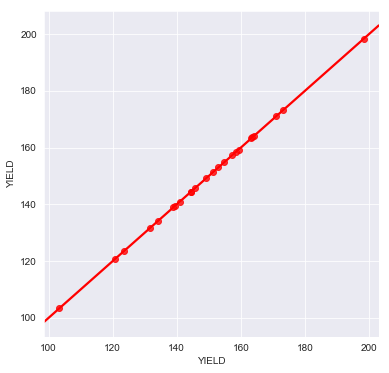


 correlation matrix for YIELD and LAT:
[[ 1.         -0.71270308]
 [-0.71270308  1.        ]]
correlation coefficient for YIELD and LAT is:
-0.7127030807629232
Scatterplot with linear regression:


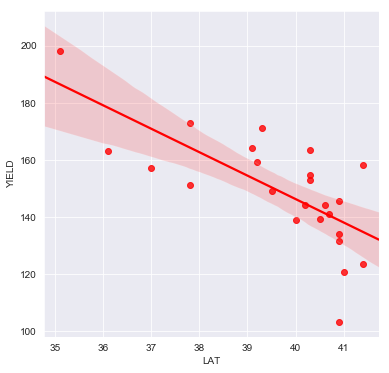


 correlation matrix for YIELD and LONG:
[[ 1.        -0.1546693]
 [-0.1546693  1.       ]]
correlation coefficient for YIELD and LONG is:
-0.15466930340960464
Scatterplot with linear regression:


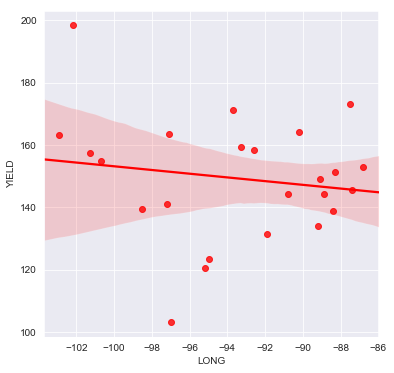


 correlation matrix for YIELD and ENV_YIELD_MEAN:
[[1.        0.7437192]
 [0.7437192 1.       ]]
correlation coefficient for YIELD and ENV_YIELD_MEAN is:
0.7437191978457695
Scatterplot with linear regression:


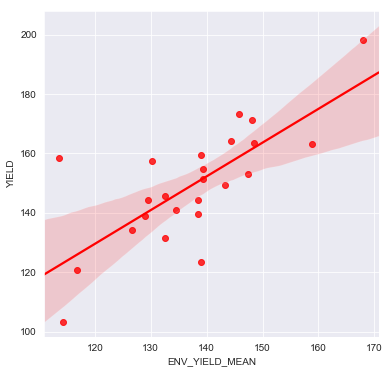


 correlation matrix for YIELD and ENV_YIELD_STD:
[[1.         0.04113305]
 [0.04113305 1.        ]]
correlation coefficient for YIELD and ENV_YIELD_STD is:
0.04113304908779504
Scatterplot with linear regression:


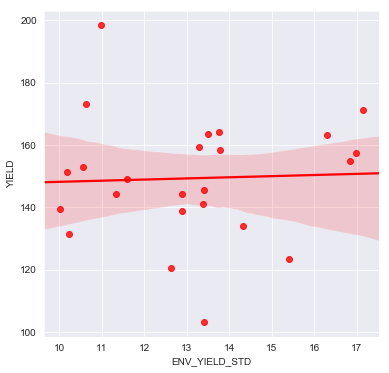


 correlation matrix for YIELD and ELEVATION:
[[1.        0.3027995]
 [0.3027995 1.       ]]
correlation coefficient for YIELD and ELEVATION is:
0.3027995048730867
Scatterplot with linear regression:


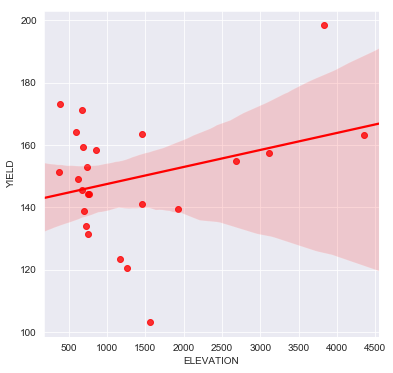


 correlation matrix for YIELD and CLAY:
[[ 1.        -0.3649034]
 [-0.3649034  1.       ]]
correlation coefficient for YIELD and CLAY is:
-0.3649033989595177
Scatterplot with linear regression:


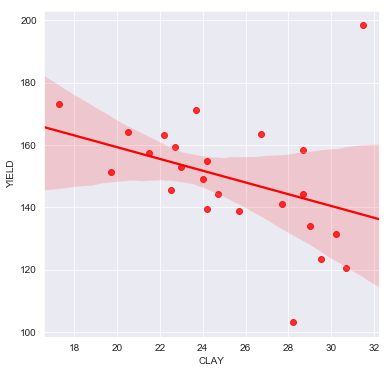


 correlation matrix for YIELD and SILT:
[[ 1.         -0.39851246]
 [-0.39851246  1.        ]]
correlation coefficient for YIELD and SILT is:
-0.3985124569159219
Scatterplot with linear regression:


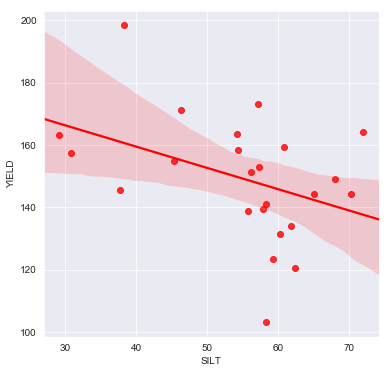


 correlation matrix for YIELD and SAND:
[[1.         0.46923678]
 [0.46923678 1.        ]]
correlation coefficient for YIELD and SAND is:
0.46923678141588604
Scatterplot with linear regression:


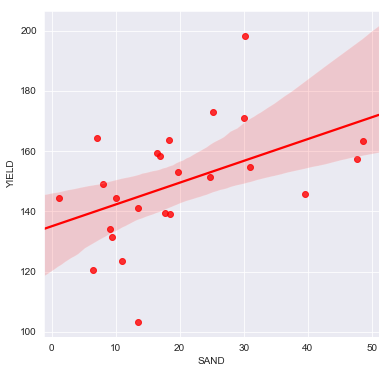


 correlation matrix for YIELD and AWC:
[[ 1.         -0.48228145]
 [-0.48228145  1.        ]]
correlation coefficient for YIELD and AWC is:
-0.4822814535606335
Scatterplot with linear regression:


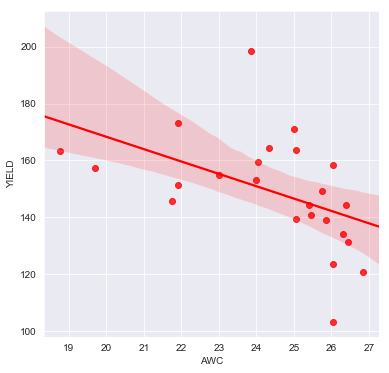


 correlation matrix for YIELD and PH:
[[1.         0.46030195]
 [0.46030195 1.        ]]
correlation coefficient for YIELD and PH is:
0.460301945827056
Scatterplot with linear regression:


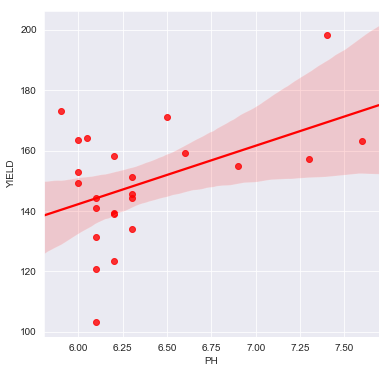


 correlation matrix for YIELD and OM:
[[ 1.         -0.33699864]
 [-0.33699864  1.        ]]
correlation coefficient for YIELD and OM is:
-0.3369986413881315
Scatterplot with linear regression:


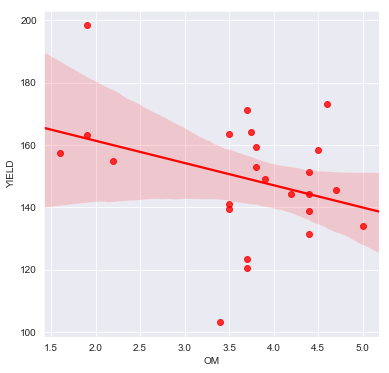


 correlation matrix for YIELD and CEC:
[[ 1.         -0.46843918]
 [-0.46843918  1.        ]]
correlation coefficient for YIELD and CEC is:
-0.4684391847337154
Scatterplot with linear regression:


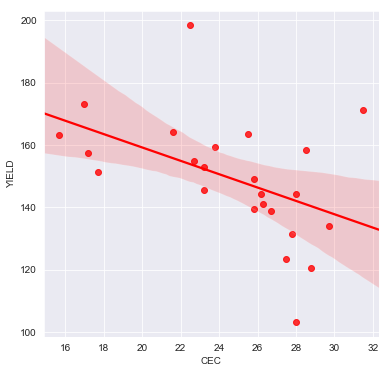


 correlation matrix for YIELD and KSAT:
[[1.         0.34550146]
 [0.34550146 1.        ]]
correlation coefficient for YIELD and KSAT is:
0.34550145842254343
Scatterplot with linear regression:


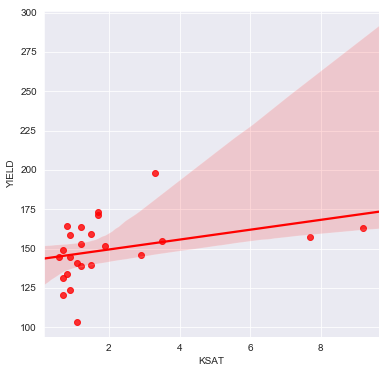


 Sorted corr.coeff
[('LAT', -0.7127030807629232), ('AWC', -0.4822814535606335), ('CEC', -0.4684391847337154), ('SILT', -0.3985124569159219), ('CLAY', -0.3649033989595177), ('OM', -0.3369986413881315), ('LONG', -0.15466930340960464), ('ENV_YIELD_STD', 0.04113304908779504), ('ELEVATION', 0.3027995048730867), ('KSAT', 0.34550145842254343), ('PH', 0.460301945827056), ('SAND', 0.46923678141588604), ('ENV_YIELD_MEAN', 0.7437191978457695), ('YIELD', 1.0)]

 Sorted absolute values of corr.coeff:
[('ENV_YIELD_STD', 0.04113304908779504), ('LONG', 0.15466930340960464), ('ELEVATION', 0.3027995048730867), ('OM', 0.3369986413881315), ('KSAT', 0.34550145842254343), ('CLAY', 0.3649033989595177), ('SILT', 0.3985124569159219), ('PH', 0.460301945827056), ('CEC', 0.4684391847337154), ('SAND', 0.46923678141588604), ('AWC', 0.4822814535606335), ('LAT', 0.7127030807629232), ('ENV_YIELD_MEAN', 0.7437191978457695), ('YIELD', 1.0)]

for hybrid H3794:

 correlation matrix for YIELD and YIELD:
[[1. 1.]
 [1. 1.]]

<Figure size 432x288 with 0 Axes>

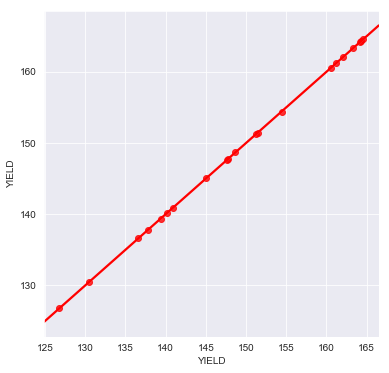


 correlation matrix for YIELD and LAT:
[[ 1.         -0.13841628]
 [-0.13841628  1.        ]]
correlation coefficient for YIELD and LAT is:
-0.1384162783486461
Scatterplot with linear regression:


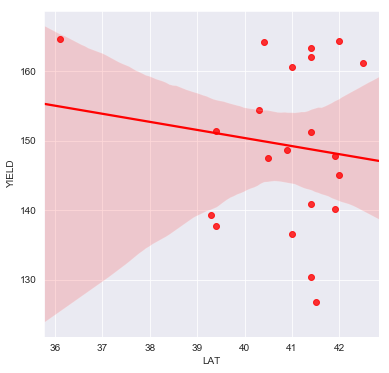


 correlation matrix for YIELD and LONG:
[[ 1.         -0.30176584]
 [-0.30176584  1.        ]]
correlation coefficient for YIELD and LONG is:
-0.30176584321634004
Scatterplot with linear regression:


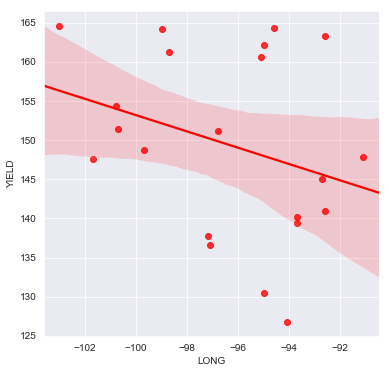


 correlation matrix for YIELD and ENV_YIELD_MEAN:
[[1.       0.655779]
 [0.655779 1.      ]]
correlation coefficient for YIELD and ENV_YIELD_MEAN is:
0.6557790039751281
Scatterplot with linear regression:


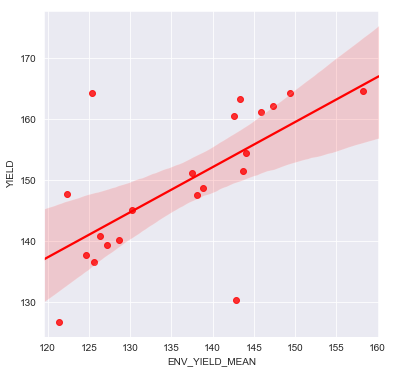


 correlation matrix for YIELD and ENV_YIELD_STD:
[[ 1.         -0.24237368]
 [-0.24237368  1.        ]]
correlation coefficient for YIELD and ENV_YIELD_STD is:
-0.24237367965090817
Scatterplot with linear regression:


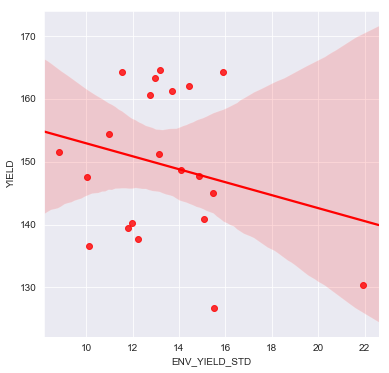


 correlation matrix for YIELD and ELEVATION:
[[1.         0.35784657]
 [0.35784657 1.        ]]
correlation coefficient for YIELD and ELEVATION is:
0.35784657008040766
Scatterplot with linear regression:


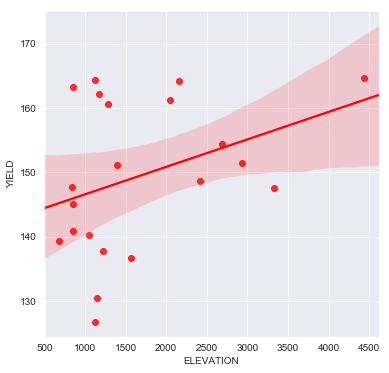


 correlation matrix for YIELD and CLAY:
[[ 1.         -0.26830672]
 [-0.26830672  1.        ]]
correlation coefficient for YIELD and CLAY is:
-0.2683067231298999
Scatterplot with linear regression:


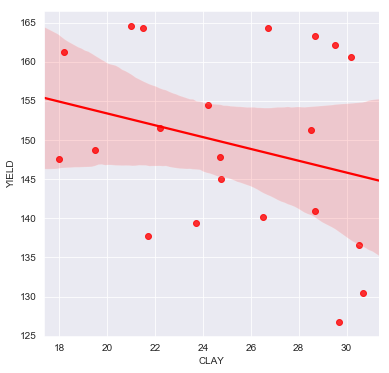


 correlation matrix for YIELD and SILT:
[[ 1.         -0.25334532]
 [-0.25334532  1.        ]]
correlation coefficient for YIELD and SILT is:
-0.25334531558993034
Scatterplot with linear regression:


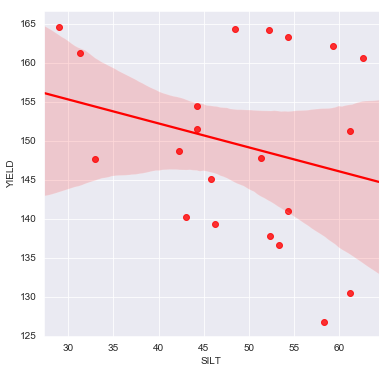


 correlation matrix for YIELD and SAND:
[[1.         0.26496297]
 [0.26496297 1.        ]]
correlation coefficient for YIELD and SAND is:
0.2649629743571364
Scatterplot with linear regression:


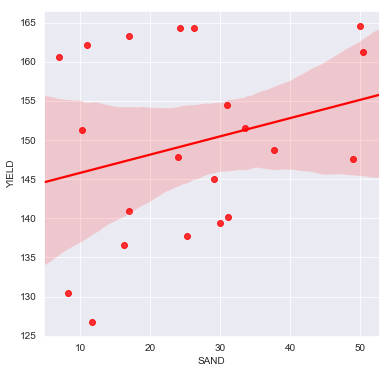


 correlation matrix for YIELD and AWC:
[[ 1.         -0.31125793]
 [-0.31125793  1.        ]]
correlation coefficient for YIELD and AWC is:
-0.311257934822252
Scatterplot with linear regression:


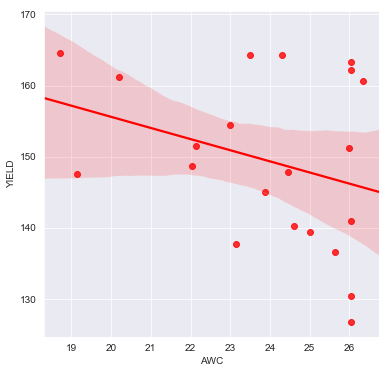


 correlation matrix for YIELD and PH:
[[1.        0.2381855]
 [0.2381855 1.       ]]
correlation coefficient for YIELD and PH is:
0.23818549641883874
Scatterplot with linear regression:


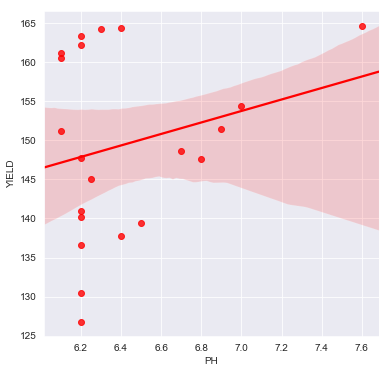


 correlation matrix for YIELD and OM:
[[ 1.         -0.14248794]
 [-0.14248794  1.        ]]
correlation coefficient for YIELD and OM is:
-0.14248793949208596
Scatterplot with linear regression:


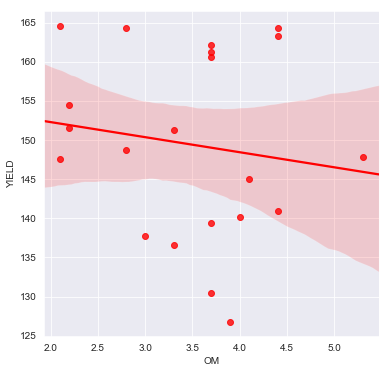


 correlation matrix for YIELD and CEC:
[[ 1.         -0.35648042]
 [-0.35648042  1.        ]]
correlation coefficient for YIELD and CEC is:
-0.35648042185477824
Scatterplot with linear regression:


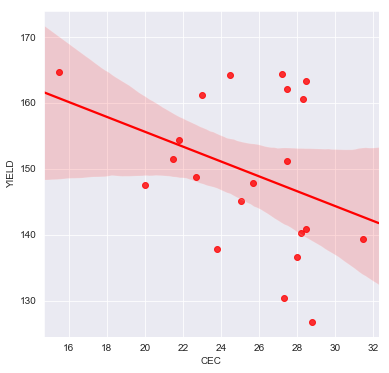


 correlation matrix for YIELD and KSAT:
[[1.         0.31987262]
 [0.31987262 1.        ]]
correlation coefficient for YIELD and KSAT is:
0.319872621558319
Scatterplot with linear regression:


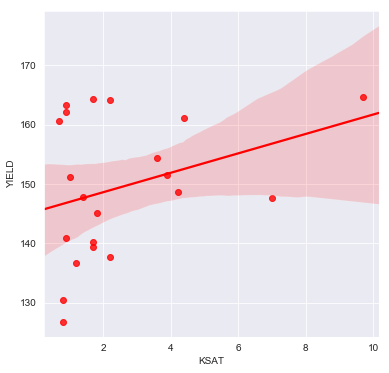


 Sorted corr.coeff
[('CEC', -0.35648042185477824), ('AWC', -0.311257934822252), ('LONG', -0.30176584321634004), ('CLAY', -0.2683067231298999), ('SILT', -0.25334531558993034), ('ENV_YIELD_STD', -0.24237367965090817), ('OM', -0.14248793949208596), ('LAT', -0.1384162783486461), ('PH', 0.23818549641883874), ('SAND', 0.2649629743571364), ('KSAT', 0.319872621558319), ('ELEVATION', 0.35784657008040766), ('ENV_YIELD_MEAN', 0.6557790039751281), ('YIELD', 1.0)]

 Sorted absolute values of corr.coeff:
[('LAT', 0.1384162783486461), ('OM', 0.14248793949208596), ('PH', 0.23818549641883874), ('ENV_YIELD_STD', 0.24237367965090817), ('SILT', 0.25334531558993034), ('SAND', 0.2649629743571364), ('CLAY', 0.2683067231298999), ('LONG', 0.30176584321634004), ('AWC', 0.311257934822252), ('KSAT', 0.319872621558319), ('CEC', 0.35648042185477824), ('ELEVATION', 0.35784657008040766), ('ENV_YIELD_MEAN', 0.6557790039751281), ('YIELD', 1.0)]

for hybrid H3931:

 correlation matrix for YIELD and YIELD:
[[1. 1.]
 [1.

<Figure size 432x288 with 0 Axes>

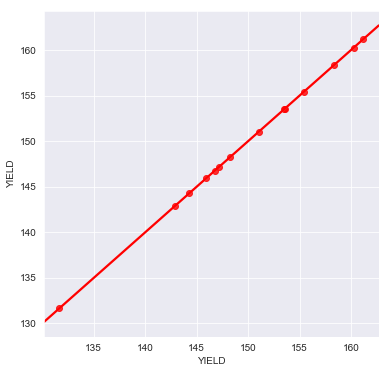


 correlation matrix for YIELD and LAT:
[[1.        0.3962936]
 [0.3962936 1.       ]]
correlation coefficient for YIELD and LAT is:
0.3962936005532529
Scatterplot with linear regression:


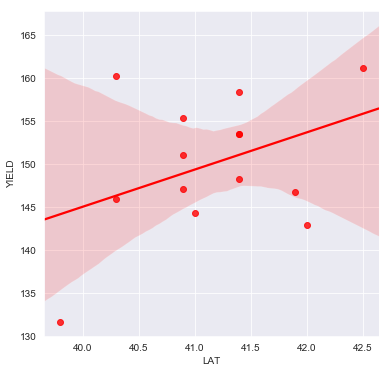


 correlation matrix for YIELD and LONG:
[[ 1.         -0.37718031]
 [-0.37718031  1.        ]]
correlation coefficient for YIELD and LONG is:
-0.37718031367549365
Scatterplot with linear regression:


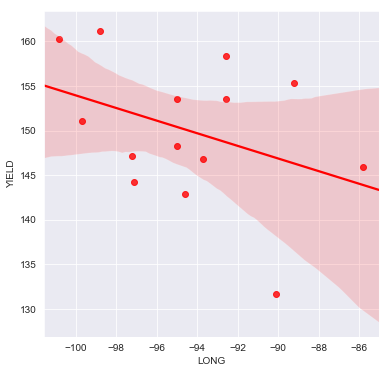


 correlation matrix for YIELD and ENV_YIELD_MEAN:
[[1.         0.58469186]
 [0.58469186 1.        ]]
correlation coefficient for YIELD and ENV_YIELD_MEAN is:
0.5846918606765467
Scatterplot with linear regression:


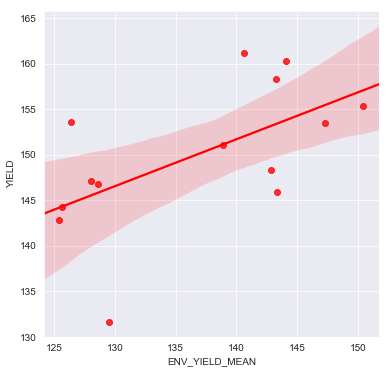


 correlation matrix for YIELD and ENV_YIELD_STD:
[[1.         0.17711776]
 [0.17711776 1.        ]]
correlation coefficient for YIELD and ENV_YIELD_STD is:
0.17711775980724093
Scatterplot with linear regression:


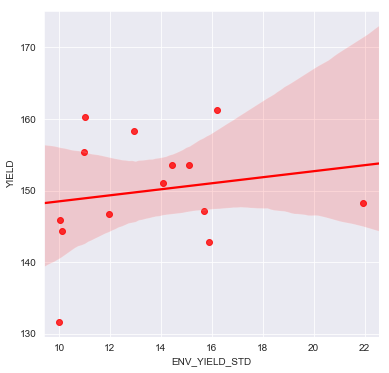


 correlation matrix for YIELD and ELEVATION:
[[1.         0.43811708]
 [0.43811708 1.        ]]
correlation coefficient for YIELD and ELEVATION is:
0.43811707521659854
Scatterplot with linear regression:


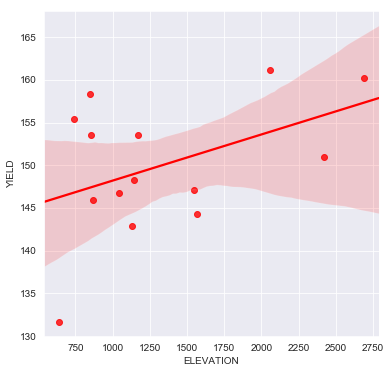


 correlation matrix for YIELD and CLAY:
[[ 1.         -0.31170788]
 [-0.31170788  1.        ]]
correlation coefficient for YIELD and CLAY is:
-0.31170787898703634
Scatterplot with linear regression:


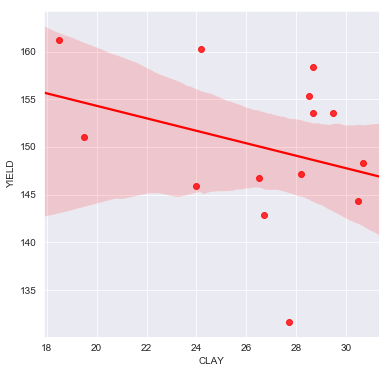


 correlation matrix for YIELD and SILT:
[[ 1.         -0.46896968]
 [-0.46896968  1.        ]]
correlation coefficient for YIELD and SILT is:
-0.4689696769459143
Scatterplot with linear regression:


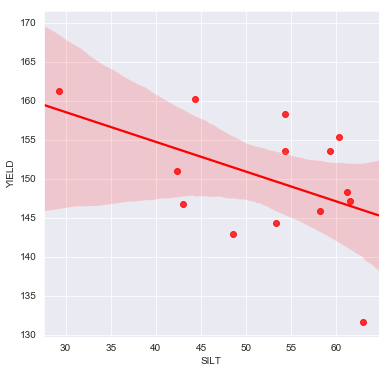


 correlation matrix for YIELD and SAND:
[[1.         0.43758839]
 [0.43758839 1.        ]]
correlation coefficient for YIELD and SAND is:
0.43758838656959304
Scatterplot with linear regression:


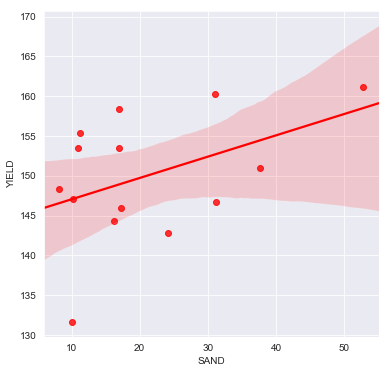


 correlation matrix for YIELD and AWC:
[[ 1.         -0.40523944]
 [-0.40523944  1.        ]]
correlation coefficient for YIELD and AWC is:
-0.40523944303354315
Scatterplot with linear regression:


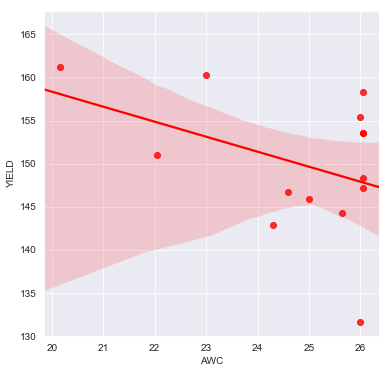


 correlation matrix for YIELD and PH:
[[1.         0.23927403]
 [0.23927403 1.        ]]
correlation coefficient for YIELD and PH is:
0.23927403084865828
Scatterplot with linear regression:


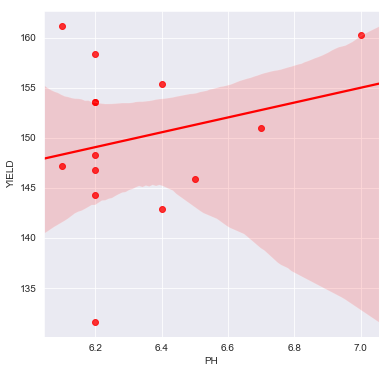


 correlation matrix for YIELD and OM:
[[ 1.         -0.20794155]
 [-0.20794155  1.        ]]
correlation coefficient for YIELD and OM is:
-0.20794155184551855
Scatterplot with linear regression:


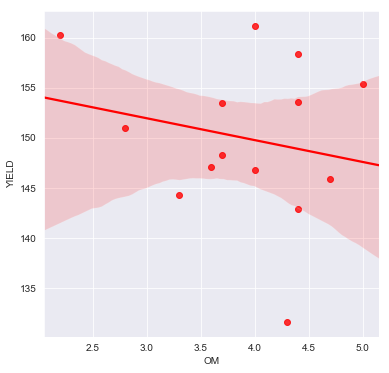


 correlation matrix for YIELD and CEC:
[[ 1.         -0.40284194]
 [-0.40284194  1.        ]]
correlation coefficient for YIELD and CEC is:
-0.40284194065360274
Scatterplot with linear regression:


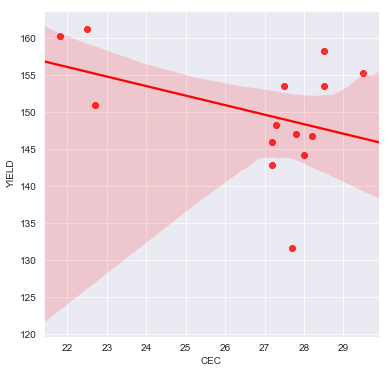


 correlation matrix for YIELD and KSAT:
[[1.         0.44225851]
 [0.44225851 1.        ]]
correlation coefficient for YIELD and KSAT is:
0.44225851333769983
Scatterplot with linear regression:


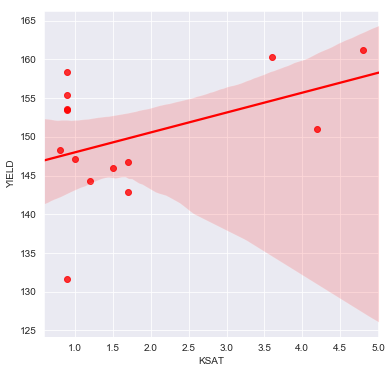


 Sorted corr.coeff
[('SILT', -0.4689696769459143), ('AWC', -0.40523944303354315), ('CEC', -0.40284194065360274), ('LONG', -0.37718031367549365), ('CLAY', -0.31170787898703634), ('OM', -0.20794155184551855), ('ENV_YIELD_STD', 0.17711775980724093), ('PH', 0.23927403084865828), ('LAT', 0.3962936005532529), ('SAND', 0.43758838656959304), ('ELEVATION', 0.43811707521659854), ('KSAT', 0.44225851333769983), ('ENV_YIELD_MEAN', 0.5846918606765467), ('YIELD', 1.0)]

 Sorted absolute values of corr.coeff:
[('ENV_YIELD_STD', 0.17711775980724093), ('OM', 0.20794155184551855), ('PH', 0.23927403084865828), ('CLAY', 0.31170787898703634), ('LONG', 0.37718031367549365), ('LAT', 0.3962936005532529), ('CEC', 0.40284194065360274), ('AWC', 0.40523944303354315), ('SAND', 0.43758838656959304), ('ELEVATION', 0.43811707521659854), ('KSAT', 0.44225851333769983), ('SILT', 0.4689696769459143), ('ENV_YIELD_MEAN', 0.5846918606765467), ('YIELD', 1.0)]


<Figure size 432x288 with 0 Axes>

In [169]:
for i in range(3):
    print('\nfor hybrid '+lista_top3[i]+':')
    correlation_f(lista_top3[i])

For all continuous attributes plotting correlation plot for top 3 hybrids

Plotting correlation plot for all continuous attributes for hybrid H2870


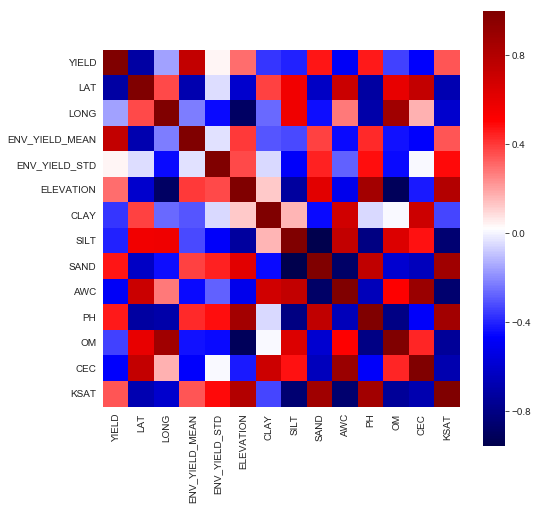

Plotting correlation plot for all continuous attributes for hybrid H3794


<Figure size 432x288 with 0 Axes>

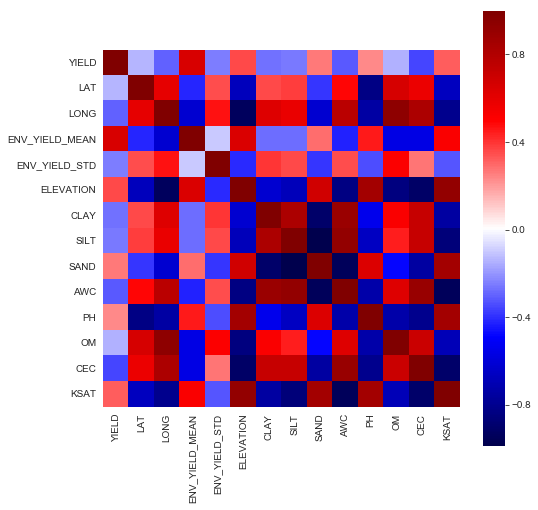

Plotting correlation plot for all continuous attributes for hybrid H3931


<Figure size 432x288 with 0 Axes>

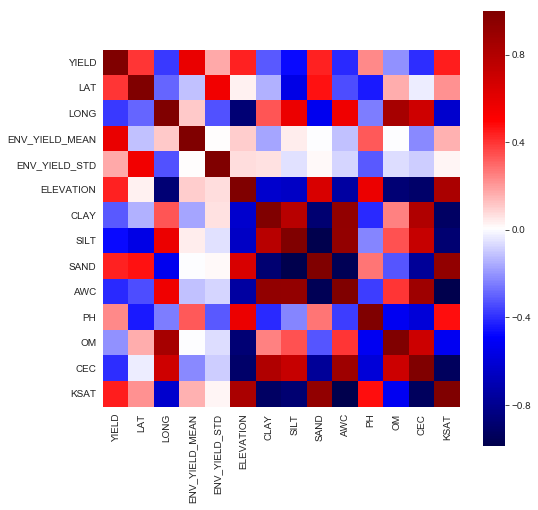

<Figure size 432x288 with 0 Axes>

In [170]:
performance_continuous = performance[['HYBRID_ID','YIELD','LAT','LONG','ENV_YIELD_MEAN','ENV_YIELD_STD','ELEVATION','CLAY','SILT','SAND','AWC','PH','OM','CEC','KSAT']]
for i in range(3): 
    plt.figure(figsize=(8,8))
    print('Plotting correlation plot for all continuous attributes for hybrid '+ lista_top3[i])
    sns.set_context(rc={"figure.figsize": (10, 10)})
    performance_continuous_hybrid = performance_continuous[performance_continuous['HYBRID_ID']==lista_top3[i]]
    corrmat = performance_continuous_hybrid.corr()
    sns.heatmap(corrmat, square=True,cmap='seismic')
    plt.savefig('heatmap'+lista_top3[i]+ '.png', dpi=100)
    plt.show()
    plt.clf()

# 6. For each year discover top 3 locations where yield was the highest. Aggregate ranks and present them as dots(of different size and color) located on plot according to latitude and longitude.

In [171]:
p_year = performance.groupby([performance['YEAR'],performance['ENV_ID']])
p_year_mean = p_year.mean()
env = []
for i in range(2008,2018):
    p_sort_yield = p_year_mean.loc[i].sort_values(by=['YIELD'],ascending=0)
    per_3 = p_sort_yield.iloc[:3,2:5]
    per_3['score_ranked']=per_3['YIELD'].rank(ascending=1)
    per_3.sort_values(by=['score_ranked'])
    per_3['lat_lon'] = list(zip(per_3.LAT, per_3.LONG)) 
    print('\nFor year:'),print(i)
    print(per_3)
    print('\nTop 3 locations where the yield was the highest are:')
    print(per_3.index.values.tolist())
   
    env = per_3.index.values.tolist() + env #list of all environments that gave the top 3 highest yield for each year
 


For year:
2008
               YIELD   LAT   LONG  score_ranked  \
ENV_ID                                            
Env_935   168.315223  36.1 -102.8           3.0   
Env_1259  152.553211  36.2 -101.0           2.0   
Env_945   149.002432  36.0 -101.8           1.0   

                                          lat_lon  
ENV_ID                                             
Env_935   (36.1000000000002, -102.80000000000058)  
Env_1259             (36.200000000000024, -101.0)  
Env_945               (36.0, -101.80000000000179)  

Top 3 locations where the yield was the highest are:
['Env_935', 'Env_1259', 'Env_945']

For year:
2009
              YIELD   LAT   LONG  score_ranked  \
ENV_ID                                           
Env_946  161.866618  36.1 -101.8           3.0   
Env_971  152.181985  40.2 -100.7           2.0   
Env_963  149.655546  40.2 -100.7           1.0   

                                           lat_lon  
ENV_ID                                              
Env_94

In [172]:
len(np.unique(env)) == len(env) 
#this means each environment showed only once in results, we don't have to sum scores for any (if that was the case, eg. some 
#environment repeated in the results for top3 environments, then we would have sumed all scores for that environment)

True

In [173]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap

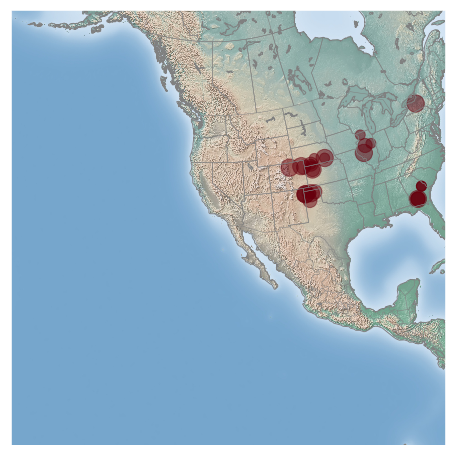

<Figure size 432x288 with 0 Axes>

In [174]:
#visualizing environments (top 3) where was the highest yield for each year by their latitude and longitude
    #Drawing the map background:
fig = plt.figure(figsize=(8, 8))
m = Basemap(llcrnrlon=-150,llcrnrlat=0,urcrnrlon=-60.,urcrnrlat=50.,\
            resolution='l',area_thresh=1000.,projection='poly',\
            lat_0=30.,lon_0=-120.)  
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

for i in range(2008,2018):
    p_sort_yield = p_year_mean.loc[i].sort_values(by=['YIELD'],ascending=0)
    per_3 = p_sort_yield.iloc[:3,2:5]
    per_3['score_ranked']=per_3['YIELD'].rank(ascending=1)
    per_3.sort_values(by=['score_ranked'])
    per_3['lat_lon'] = list(zip(per_3.LAT, per_3.LONG)) 
    lat = per_3['LAT'].values
    lon = per_3['LONG'].values
    population = per_3['score_ranked'].values
    score = per_3['score_ranked'].values
    # scatterplot for our data, with color reflecting population(ENV_id) and size reflecting score
    m.scatter(lon, lat, latlon=True,
          c=population*100, s=score*100,
          cmap='Reds', alpha=0.5)
  #  plt.colorbar(label=r'$\log_{10}({\rm population})$')
    plt.clim(3, 7)
    for a in [100, 200, 300]:
        plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
    #plt.legend(scatterpoints=1, frameon=False,
        # labelspacing=1, loc='lower left');
plt.savefig('usa.png', bbox_inches='tight')
plt.show()
plt.clf()

# 7 Analyse weather on the environments that gave the highest yield 



In [175]:
w_env = weather.groupby(['ENV_ID'])
w_env_mean = w_env.mean()
w_env_mean

,DAY_NUM,DAYL,PREC,SRAD,SWE,TMAX,TMIN,VP
ENV_ID,,,,,,,,
Env_1,183.0,43200.000043,1.684932,276.111781,11.167123,8.093151,-3.256164,630.356164
Env_10,183.0,43200.946768,3.079452,294.978630,19.868493,12.095890,2.241096,874.191781
Env_100,183.0,43200.000069,2.901370,296.714521,20.679452,12.616438,0.632877,820.054795
Env_1000,183.0,43200.946854,2.000000,352.368219,0.997260,18.323288,2.883562,824.876712
Env_1001,183.0,43200.946854,2.561644,341.681097,2.443836,17.701370,2.924658,862.246575
Env_1002,183.0,43200.946854,2.876712,348.729863,0.460274,19.241096,3.761644,914.739726
Env_1003,183.0,43200.946854,1.843836,359.390685,6.816438,18.979452,2.680822,841.315068
Env_1004,183.0,43200.946854,0.810959,373.742466,4.219178,21.521918,3.890411,644.602740
Env_1005,183.0,43200.946854,1.386301,359.101370,0.613699,18.705479,2.741096,750.575342


In [199]:
per_env= performance.groupby(performance['ENV_ID'])
per_env_m = per_env.mean()
per_env_m_sort = pppm.sort_values(by=['YIELD'],ascending=0 )
env3_yield = per_env_m_sort.index.tolist()[0:3]
env3_yield
#top 3 locations where yield was the highest

['Env_1178', 'Env_560', 'Env_1248']

In [177]:
envir_top_yield = weather[weather['ENV_ID'].isin(env3_yield)]
envir_top_yield
#weather for top 3 locations

,ENV_ID,DAY_NUM,DAYL,PREC,SRAD,SWE,TMAX,TMIN,VP
204035,Env_560,1,33177.60156,0,259.200012,20,9.0,-10.0,240
204036,Env_560,3,33177.60156,0,272.000000,20,12.0,-8.5,240
204037,Env_560,4,33177.60156,0,259.200012,20,14.0,-5.0,320
204038,Env_560,5,33177.60156,0,259.200012,16,16.5,-2.5,360
204039,Env_560,6,33523.19922,0,272.000000,16,19.0,-1.5,360
204040,Env_560,7,33523.19922,0,224.000000,16,7.0,-7.5,240
204041,Env_560,8,33523.19922,0,224.000000,16,5.5,-9.0,240
204042,Env_560,9,33523.19922,0,230.399994,16,7.0,-8.0,240
204043,Env_560,10,33523.19922,0,256.000000,16,12.5,-5.0,240
204044,Env_560,11,33523.19922,0,272.000000,16,13.0,-6.0,200


In [201]:
w_env_mean #for all environments

,DAY_NUM,DAYL,PREC,SRAD,SWE,TMAX,TMIN,VP
ENV_ID,,,,,,,,
Env_1,183.0,43200.000043,1.684932,276.111781,11.167123,8.093151,-3.256164,630.356164
Env_10,183.0,43200.946768,3.079452,294.978630,19.868493,12.095890,2.241096,874.191781
Env_100,183.0,43200.000069,2.901370,296.714521,20.679452,12.616438,0.632877,820.054795
Env_1000,183.0,43200.946854,2.000000,352.368219,0.997260,18.323288,2.883562,824.876712
Env_1001,183.0,43200.946854,2.561644,341.681097,2.443836,17.701370,2.924658,862.246575
Env_1002,183.0,43200.946854,2.876712,348.729863,0.460274,19.241096,3.761644,914.739726
Env_1003,183.0,43200.946854,1.843836,359.390685,6.816438,18.979452,2.680822,841.315068
Env_1004,183.0,43200.946854,0.810959,373.742466,4.219178,21.521918,3.890411,644.602740
Env_1005,183.0,43200.946854,1.386301,359.101370,0.613699,18.705479,2.741096,750.575342


In [196]:
envir_top_yield.mean()

DAY_NUM      183.000000
DAYL       43200.000000
PREC           1.560731
SRAD         361.857169
SWE            1.435616
TMAX          19.719178
TMIN           3.826484
VP           809.497717
dtype: float64

In [197]:
envir_top_yield[envir_top_yield['PREC']==0]
#interesting fact that precipitation was almost always (929 out of 1095) 0 for top 3 environments with the highest yield

,ENV_ID,DAY_NUM,DAYL,PREC,SRAD,SWE,TMAX,TMIN,VP
204035,Env_560,1,33177.60156,0,259.200012,20,9.0,-10.0,240
204036,Env_560,3,33177.60156,0,272.000000,20,12.0,-8.5,240
204037,Env_560,4,33177.60156,0,259.200012,20,14.0,-5.0,320
204038,Env_560,5,33177.60156,0,259.200012,16,16.5,-2.5,360
204039,Env_560,6,33523.19922,0,272.000000,16,19.0,-1.5,360
204040,Env_560,7,33523.19922,0,224.000000,16,7.0,-7.5,240
204041,Env_560,8,33523.19922,0,224.000000,16,5.5,-9.0,240
204042,Env_560,9,33523.19922,0,230.399994,16,7.0,-8.0,240
204043,Env_560,10,33523.19922,0,256.000000,16,12.5,-5.0,240
204044,Env_560,11,33523.19922,0,272.000000,16,13.0,-6.0,200


In [191]:
p_env3 = performance[performance['ENV_ID'].isin(env3_yield)]
p_env3_location = p_env3[['LAT','LONG']]
print(p_env3_location['LAT'].unique())
print(p_env3_location['LONG'].unique())
#we conclude those 2 of those 3 locations with the highest yield are near each other and the 3rd isn't so far, so that land is either fertile or the climate was good

[40.2 40.6 35.1]
[-102.6  -97.8 -102.2]


In [181]:
env_g = envir_top_yield.groupby(envir_top_yield['ENV_ID'])
env_g_m = env_g.mean()
env_g_m

,DAY_NUM,DAYL,PREC,SRAD,SWE,TMAX,TMIN,VP
ENV_ID,,,,,,,,
Env_1178,183.0,43200.0,2.224658,331.712877,0.734247,16.691781,3.227397,907.178082
Env_1248,183.0,43200.0,1.594521,381.527671,0.142466,21.419178,5.021918,890.958904
Env_560,183.0,43200.0,0.863014,372.330959,3.430137,21.046575,3.230137,630.356164


Plotting correlation plot for all attributes for Env_1178


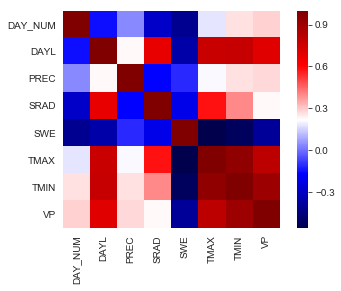

Plotting correlation plot for all attributes for Env_560


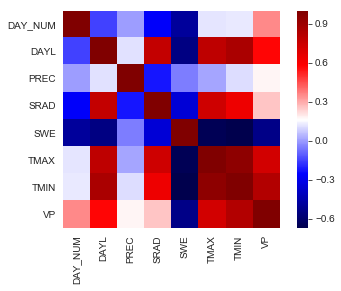

Plotting correlation plot for all attributes for Env_1248


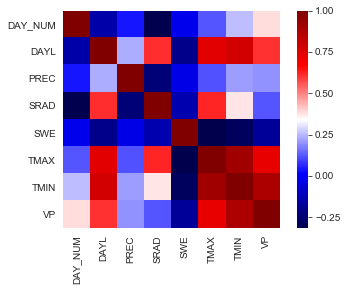

<Figure size 432x288 with 0 Axes>

In [108]:
#correlation for all attributes for top 3 locations
for i in range(3):   
    print('Plotting correlation plot for all attributes for '+env3_yield[i])
    environment_i = envir_top_yield[envir_top_yield['ENV_ID']== env3_yield[i]]
    sns.set_context(rc={"figure.figsize": (10, 10)})
    corrmat = environment_i.corr()
    sns.heatmap(corrmat, square=True,cmap='seismic')
    plt.savefig('heatmap'+env3_yield[i]+ '.png', dpi=100)
    plt.show()
    plt.clf()
    #we conclude that temperature is strongly correlated to vapor pressure, then to day length and solar radiation.